# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 After data processing and some visualization, we have a conclution that Capomulin	and Ramicane are the two best result medicine against tumor after 45 days of experiment as these two has the loweset average tumor volume. It is also obvious that the corrlation between weight of mouse and the tumor size is high.

In [27]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
import scipy.stats as st
# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
complete_data = pd.merge(study_results,mouse_metadata, how="left", on=["Mouse ID"])
complete_data.head()
# Display the data table for preview

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [28]:
# Checking the number of mice.
mice_count = complete_data["Mouse ID"].nunique()
mice_count

249

In [29]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
dupli = complete_data[complete_data.duplicated(["Mouse ID", "Timepoint"])]
dupli["Mouse ID"].unique()

array(['g989'], dtype=object)

In [30]:
# Optional: Get all the data for the duplicate mouse ID. 
dup = complete_data.loc[complete_data["Mouse ID"] == 'g989'].sort_index()
dup

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [31]:
# Optional: Get all the data for the duplicate mouse ID. 
clean_df = pd.concat([complete_data, dup, dup]).drop_duplicates(keep=False)
clean_df.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [32]:
clean_df["Mouse ID"].nunique()

248

In [33]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.


In [34]:
# Checking the number of mice in the clean DataFrame.


## Summary Statistics

In [35]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
mean = clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()
median = clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()
var = clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()
std = clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()
sem = clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()

summary_df = pd.DataFrame({'Mean Tumor Volume': mean,
                           'Median Tumor Volume' : median,
                           'Tumor Volume Variance' : var,
                           'Tumor Volume Std. Dev.' : std,
                           'Tumor Volume Std. Err.' : sem
                          })
summary_df

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [36]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
summary_df = clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(['mean', 'median','var','std','sem'])
summary_df


,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

Text(0, 0.5, 'Number of Mouse')

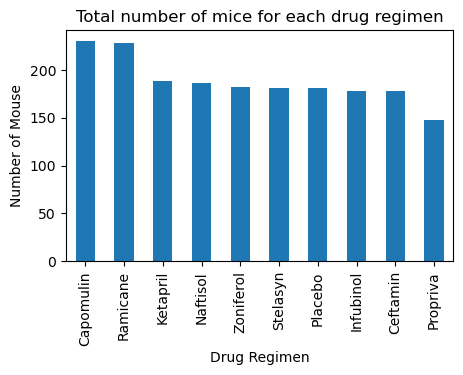

In [37]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
mouse_count = clean_df['Drug Regimen'].value_counts()
mouse_count.plot(kind="bar",figsize=(5,3))
plt.title("Total number of mice for each drug regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mouse")

<function matplotlib.pyplot.show(close=None, block=None)>

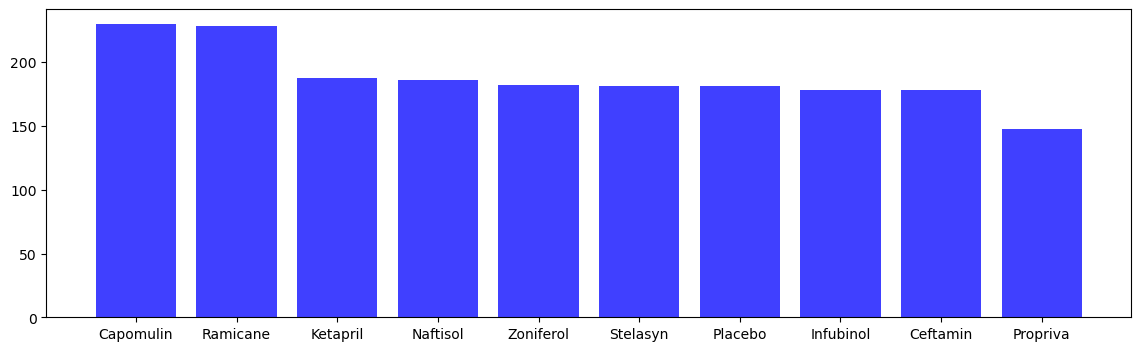

In [38]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
x_axis = mouse_count.index.values
y_axis = mouse_count.values
plt.figure(figsize=(14,4))
plt.bar(x_axis, y_axis, color='b', alpha=0.75, align="center")
plt.show


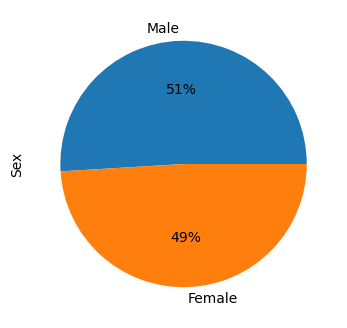

In [39]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
g_count = clean_df['Sex'].value_counts()
g_count
plot = g_count.plot.pie(figsize=(4, 4),autopct='%1.0f%%')


## Quartiles, Outliers and Boxplots

In [40]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
capo_df = clean_df.loc[clean_df['Drug Regimen'] == 'Capomulin',:]
rami_df = clean_df.loc[clean_df['Drug Regimen'] == 'Ramicane',:]
infu_df = clean_df.loc[clean_df['Drug Regimen'] == 'Infubinol',:]
ceft_df = clean_df.loc[clean_df['Drug Regimen'] == 'Ceftamin',:]



In [41]:
capo_last_timepoint = capo_df.groupby('Mouse ID')['Timepoint'].max()
capo_last_df = pd.DataFrame(capo_last_timepoint)
#df1.merge(df2, how='left', on='a')
capo_size = capo_last_df.merge(clean_df, how = "left", on=('Mouse ID', 'Timepoint'))

capo_tumor_size = capo_size['Tumor Volume (mm3)']

# # assign your quartiles, limits and iq3
q1, q3 = np.percentile(capo_tumor_size, [25, 75])
iqr = q3 - q1
lower_bound = q1 - 1.5*iqr
upper_bound = q3 + 1.5*iqr
# #create conditions to isolate the outliers
outliers = capo_tumor_size[(capo_tumor_size < lower_bound) | (capo_tumor_size > upper_bound)]
print(f"Ramicane's potential outliers{outliers}")


Ramicane's potential outliersSeries([], Name: Tumor Volume (mm3), dtype: float64)


In [42]:
rami_last_timepoint = rami_df.groupby('Mouse ID')['Timepoint'].max()
rami_last_df = pd.DataFrame(rami_last_timepoint)
#df1.merge(df2, how='left', on='a')
rami_size = rami_last_df.merge(clean_df, how = "left", on=('Mouse ID', 'Timepoint'))

rami_tumor_size = capo_size['Tumor Volume (mm3)']

# # assign your quartiles, limits and iq3
q1, q3 = np.percentile(rami_tumor_size, [25, 75])
iqr = q3 - q1
lower_bound = q1 - 1.5*iqr
upper_bound = q3 + 1.5*iqr
# #create conditions to isolate the outliers
outliers = rami_tumor_size[(rami_tumor_size < lower_bound) | (rami_tumor_size > upper_bound)]
print(f"Ramicane's potential outliers{outliers}")


Ramicane's potential outliersSeries([], Name: Tumor Volume (mm3), dtype: float64)


In [43]:
infu_last_timepoint = infu_df.groupby('Mouse ID')['Timepoint'].max()
infu_last_df = pd.DataFrame(infu_last_timepoint)
#df1.merge(df2, how='left', on='a')
infu_size = infu_last_df.merge(clean_df, how = "left", on=('Mouse ID', 'Timepoint'))

infu_tumor_size = infu_size['Tumor Volume (mm3)']

# # assign your quartiles, limits and iq3
q1, q3 = np.percentile(infu_tumor_size, [25, 75])
iqr = q3 - q1
lower_bound = q1 - 1.5*iqr
upper_bound = q3 + 1.5*iqr
# #create conditions to isolate the outliers
outliers = infu_tumor_size[(infu_tumor_size < lower_bound) | (infu_tumor_size > upper_bound)]
print(f"Infubinol's potential outliers  {outliers}")


Infubinol's potential outliers  5    36.321346
Name: Tumor Volume (mm3), dtype: float64


In [44]:
ceft_last_timepoint = ceft_df.groupby('Mouse ID')['Timepoint'].max()
ceft_last_df = pd.DataFrame(ceft_last_timepoint)
#df1.merge(df2, how='left', on='a')
ceft_size = ceft_last_df.merge(clean_df, how = "left", on=('Mouse ID', 'Timepoint'))

ceft_tumor_size = ceft_size['Tumor Volume (mm3)']

# # assign your quartiles, limits and iq3
q1, q3 = np.percentile(ceft_tumor_size, [25, 75])
iqr = q3 - q1
lower_bound = q1 - 1.5*iqr
upper_bound = q3 + 1.5*iqr
# #create conditions to isolate the outliers
outliers = ceft_tumor_size[(ceft_tumor_size < lower_bound) | (ceft_tumor_size > upper_bound)]
print(f"Ceftamin's potential outliers{outliers}")


Ceftamin's potential outliersSeries([], Name: Tumor Volume (mm3), dtype: float64)


In [45]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.


<function matplotlib.pyplot.show(close=None, block=None)>

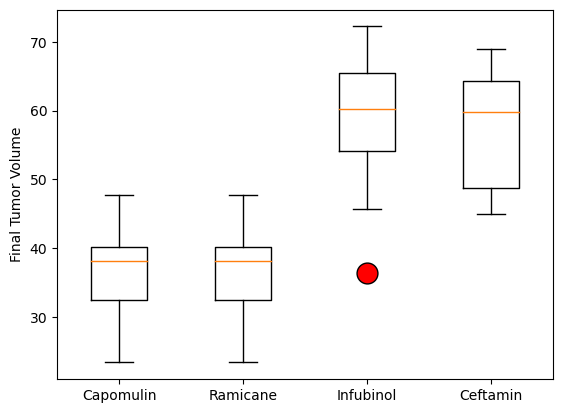

In [46]:
# Box Plot
merge_size = [capo_tumor_size,rami_tumor_size,infu_tumor_size,ceft_tumor_size]
Regimen = ['Capomulin', 'Ramicane', 'Infubinol','Ceftamin']
fig1,ax1 = plt.subplots()
plt.boxplot(merge_size,labels = Regimen,flierprops={'marker': 'o', 'markersize': 15, 'markerfacecolor': 'r'})
ax1.set_ylabel('Final Tumor Volume')
plt.show


## Line and Scatter Plots

Text(0.5, 1.0, 'Capomulin Treatment of Mouse l509')

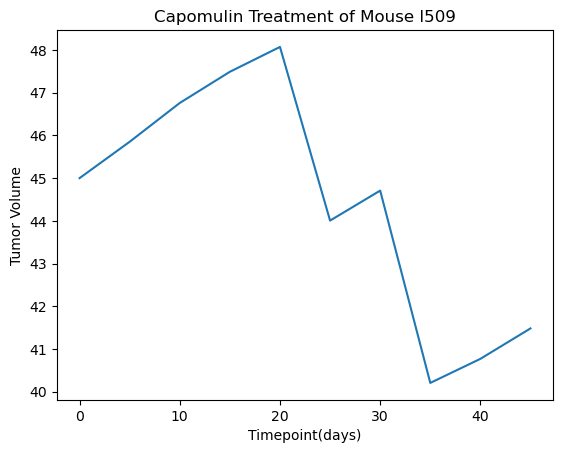

In [47]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
# capo_df stores mouse id and time point 
#need mouse ID == l509

that_mouse = capo_df.loc[capo_df['Mouse ID'] == 'l509']
that_mouse
fig1,ax1 = plt.subplots()
x_axis = that_mouse["Timepoint"]
y_axis = that_mouse["Tumor Volume (mm3)"]
plt.plot(x_axis,y_axis)
ax1.set_xlabel('Timepoint(days)')
ax1.set_ylabel('Tumor Volume')
ax1.set_title('Capomulin Treatment of Mouse l509')


C:\Users\liush\AppData\Local\Temp\ipykernel_6964\900328525.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  avg =capo_df.groupby(['Mouse ID']).mean()


Text(0, 0.5, 'Average Tumor Volume')

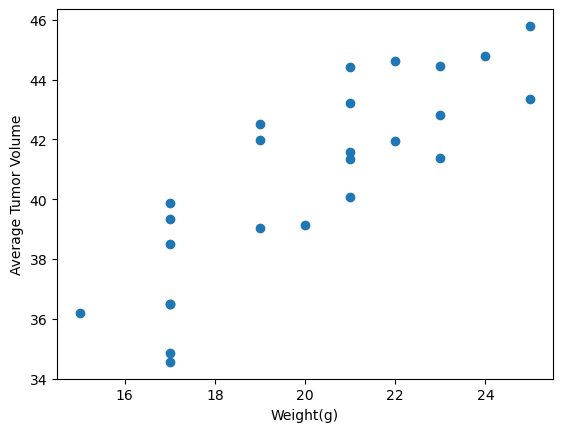

In [62]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capo_df
avg =capo_df.groupby(['Mouse ID']).mean()
avg

y_axis = avg['Tumor Volume (mm3)']
x_axis = avg['Weight (g)']
fig1,ax1 = plt.subplots()
plt.scatter(x_axis, y_axis)
ax1.set_xlabel('Weight(g)')
ax1.set_ylabel('Average Tumor Volume')

## Correlation and Regression

In [25]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen


The correlation coefiicient between weight and average tumor volue is 0.84


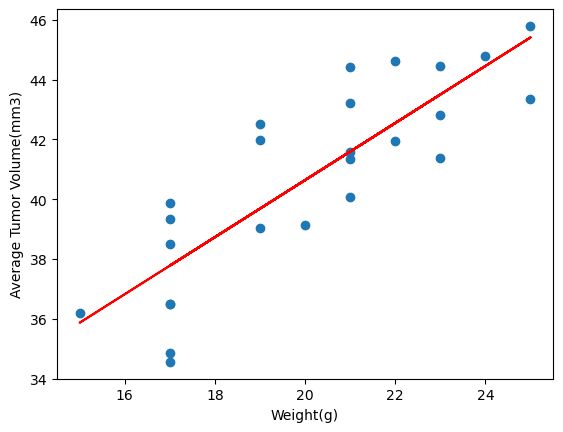

In [71]:
tumor_volume = avg.iloc[:,1]
mouse_weight = avg.iloc[:,4]
corr = round(st.pearsonr(tumor_volume,mouse_weight)[0],2)
plt.scatter(mouse_weight,tumor_volume)
plt.xlabel('Weight(g)')
plt.ylabel('Average Tumor Volume(mm3)')
w_slope, w_int, w_r, w_p, w_std_err = st.linregress(mouse_weight, tumor_volume)
w_fit = w_slope * mouse_weight + w_int
plt.plot(mouse_weight,w_fit,'-',color = 'r')
print(f'The correlation coefiicient between weight and average tumor volue is {corr}')